In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y= make_blobs(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)

logreg = LogisticRegression().fit(X_train , y_train)

print(f'Test set score: {logreg.score(X_test, y_test): .3f}')

Test set score:  0.880


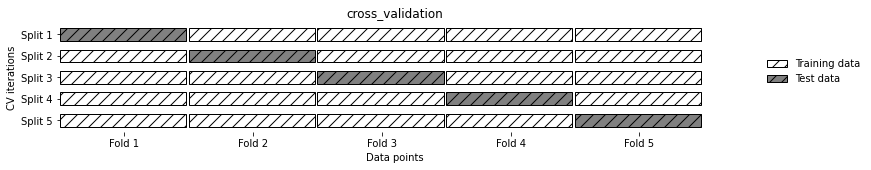

In [2]:
import mglearn

mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1500)

scores = cross_val_score(logreg, iris.data, iris.target)
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
scores =  cross_val_score(logreg, iris.data, iris.target, cv=5)

In [8]:
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [9]:
print(f'Average cross-validation score: {scores.mean()}')

Average cross-validation score: 0.9733333333333334


In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print(f'Iris labels: {iris.target}')

Iris labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


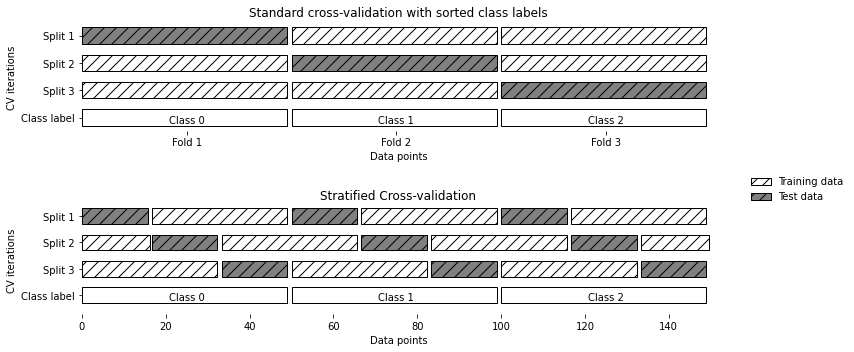

In [11]:
mglearn.plots.plot_stratified_cross_validation()

In [12]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)



In [13]:
print(f'Cross-validation scores: {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

Cross-validation scores: [1.         1.         0.86666667 0.93333333 0.83333333]


In [14]:
kfold = KFold(n_splits=3)
print(f'Cross-validation scores: {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

Cross-validation scores: [0. 0. 0.]


In [15]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print(f'Cross-validation scores: {cross_val_score(logreg, iris.data, iris.target, cv=kfold)}')

Cross-validation scores: [0.98 0.96 0.96]


In [17]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print(f'Number of cv iterations: {len(scores)}')
print(f'Mean accuracy: {scores.mean()}')

Number of cv iterations: 150
Mean accuracy: 0.9666666666666667


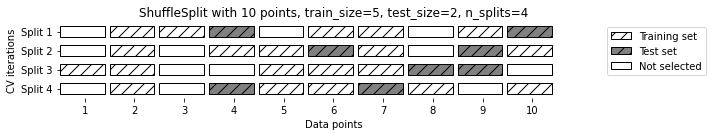

In [18]:
mglearn.plots.plot_shuffle_split()

In [20]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5,  n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [0.97333333 0.94666667 0.96       0.96       0.98666667 0.94666667
 0.98666667 0.97333333 0.98666667 0.89333333]


In [23]:
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [0.75       0.6        0.66666667]


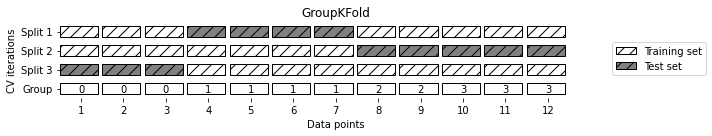

In [24]:
mglearn.plots.plot_group_kfold()

In [27]:
from sklearn.svm import SVC
X_train , X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('Size of training set: {}   size of test set: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print(f'Best score: {best_score}')
print(f'Best parameters: {best_parameters}')

Size of training set: 112   size of test set: 38
Best score: 0.9736842105263158
Best parameters: {'C': 100, 'gamma': 0.001}


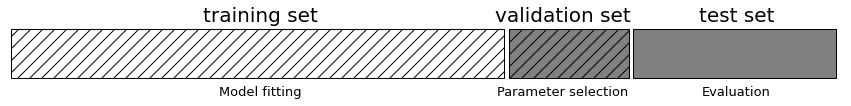

In [28]:
mglearn.plots.plot_threefold_split()

In [30]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data,iris.target, random_state=0)

X_train, X_valid , y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=0)
print('Size of training set: {}     size of validation set: {}     size of test set:{}\n'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score: 
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print(f'Best score on validaiton set: {best_score}')
print(f'Best parameters: {best_parameters}')
print(f'Test set score with parameters: {test_score}')


Size of training set: 84     size of validation set: 28     size of test set:38

Best score on validaiton set: 1.0
Best parameters: {'C': 100, 'gamma': 0.001}
Test set score with parameters: 0.9736842105263158


In [33]:
import numpy as np

for gamma in [0.001, 0.01,0.1, 1,10,100]:
    for C in [0.001, 0.01, 0.1, 1,10,100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, gamma=0.001)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

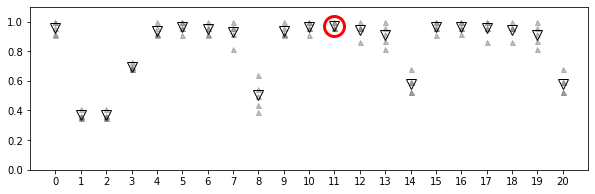

In [34]:
mglearn.plots.plot_cross_val_selection()

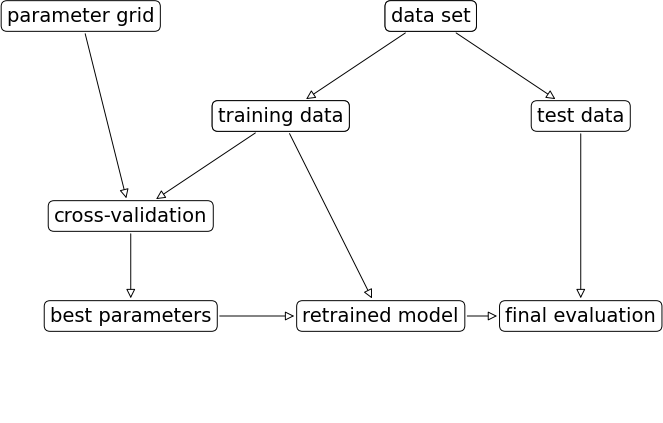

In [35]:
mglearn.plots.plot_grid_search_overview()

In [36]:
param_grid = {'C': [0.001, 0.01, 0.1, 1,10,100], 'gamma': [0.001, 0.01, 0.1,1,10,100]}
print(f'Parameter grid: {param_grid}')

Parameter grid: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [40]:
print(f'Test set score: {grid_search.score(X_test, y_test)}')

Test set score: 0.9736842105263158


In [41]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.9731225296442687


In [42]:
print(f'Best estimator: {grid_search.best_estimator_}')

Best estimator: SVC(C=10, gamma=0.1)


In [43]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)

display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001109,0.000228,0.000635,0.000120,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000955,0.000071,0.000542,0.000025,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000994,0.000214,0.000662,0.000215,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.002565,0.003436,0.000557,0.000186,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001087,0.000313,0.001058,0.000465,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


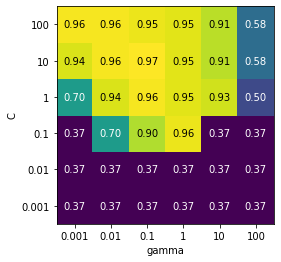

In [44]:
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'] , cmap='viridis')

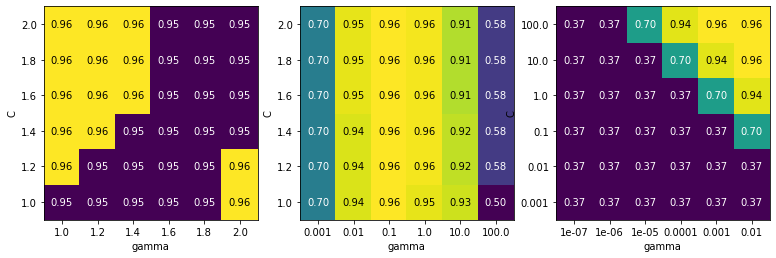

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize=(13,5))

param_grid_linear = {'C': np.linspace(1,2,6), 'gamma': np.linspace(1,2,6)}

param_grid_one_log = {'C': np.linspace(1,2,6), 'gamma': np.logspace(-3,2,6)}

param_grid_range = {'C': np.logspace(-3,2,6), 'gamma': np.logspace(-7,-2,6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    scores_image = mglearn.tools.heatmap(
    scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis', ax=ax)

In [48]:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1,10,100], 'gamma': [0.001, 0.01, 0.1, 1,10,100]},  {'kernel': ['linear'], 'C': [0.001,0.01,0.1,1,10,100]}]

print(f'List of grids : {param_grid}')

List of grids : [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [49]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.9731225296442687


In [50]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.001165,0.000927,0.001079,0.000871,0.001349,0.001141,0.000865,0.000773,0.000858,0.000898,...,0.000453,0.000617,0.000831,0.000913,0.000673,0.0006,0.00055,0.000484,0.000553,0.00052
std_fit_time,0.00023,0.000034,0.000188,0.000065,0.000191,0.000301,0.000132,0.000028,0.000116,0.000261,...,0.000011,0.000082,0.000011,0.00008,0.000053,0.000046,0.000033,0.000007,0.000073,0.00004
mean_score_time,0.000588,0.000527,0.000585,0.000564,0.000659,0.000669,0.000557,0.000447,0.000468,0.000453,...,0.000275,0.000353,0.000417,0.000429,0.000282,0.00031,0.000341,0.000253,0.000309,0.000273
std_score_time,0.000033,0.000012,0.000069,0.000196,0.000124,0.000235,0.000171,0.000009,0.00003,0.000037,...,0.000005,0.000067,0.000047,0.000022,0.000005,0.000051,0.000065,0.000001,0.000056,0.000037
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [52]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print(f'Cross-validaiton scores: {scores}')
print('Mean cross-validation score:' , scores.mean())

Cross-validaiton scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score: 0.9666666666666668


In [57]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid: 
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
            X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])

        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [58]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),  StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print(f'Cross-validation  scores: {scores}')

Cross-validation  scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [59]:
from sklearn.datasets import load_digits

digits = load_digits()

y = digits.target == 9

X_train, X_test , y_train, y_test = train_test_split(digits.data, y, random_state=0)



In [60]:
from  sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print(f'Unique predicted lables: {np.unique(pred_most_frequent)}')
print(f'Test score: {dummy_majority.score(X_test, y_test)}')

Unique predicted lables: [False]
Test score: 0.8955555555555555


In [61]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth =2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f'Test score: {tree.score(X_test, y_test)}')

Test score: 0.9177777777777778


In [63]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f'dummy score: {dummy.score(X_test, y_test)}')

logreg = LogisticRegression(C=0.1, max_iter=1500).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f'logreg score: {logreg.score(X_test, y_test)}')

dummy score: 0.8955555555555555
logreg score: 0.9844444444444445


In [64]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(f'Confusion matrix: {confusion}')


Confusion matrix: [[402   1]
 [  6  41]]


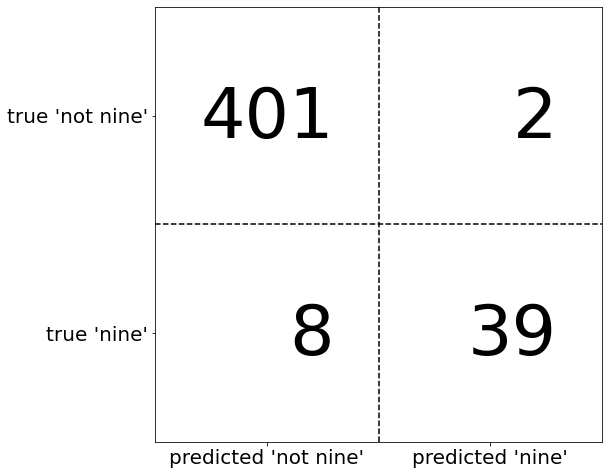

In [66]:
mglearn.plots.plot_confusion_matrix_illustration()

In [67]:
print('Most frequent class:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\nDummy model:')
print(confusion_matrix(y_test, pred_dummy))
print('\nDecision tree:')
print(confusion_matrix(y_test, pred_tree))
print('\nLogistic Regression:')
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[402   1]
 [  6  41]]


In [68]:
from sklearn.metrics import f1_score
print(f'f1 score most frequent: {f1_score(y_test, pred_most_frequent)}')
print(f'f1 score dummy: {f1_score(y_test, pred_dummy)}')
print(f'f1 score tree: {f1_score(y_test, pred_tree)}')
print(f'f1 score logistic regression: {f1_score(y_test, pred_logreg)}')

f1 score most frequent: 0.0
f1 score dummy: 0.0
f1 score tree: 0.5542168674698795
f1 score logistic regression: 0.9213483146067415


In [70]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, pred_most_frequent,target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [73]:
print(classification_report(y_test,pred_logreg,  target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [74]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400,50), cluster_std=[7,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc  =SVC(gamma=.05).fit(X_train, y_train)

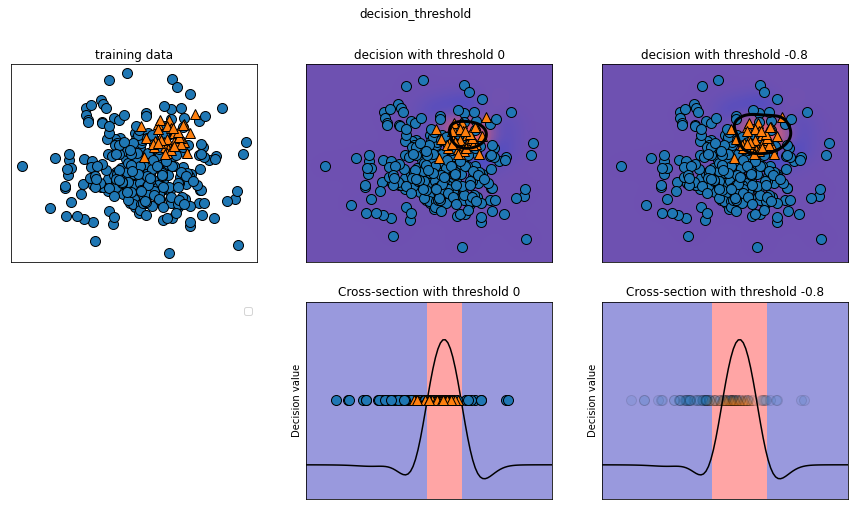

In [75]:
mglearn.plots.plot_decision_threshold()

In [76]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [77]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [78]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [79]:
from sklearn.metrics import precision_recall_curve
precision, recall , threshold =  precision_recall_curve(y_test, svc.decision_function(X_test))

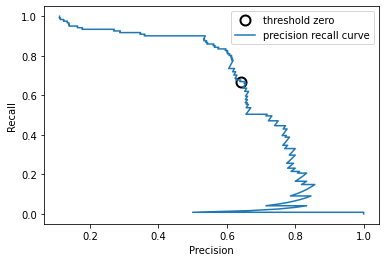

In [84]:
X, y = make_blobs(n_samples=(4000,500), cluster_std=[7,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

svc=SVC(gamma=.05).fit(X_train, y_train)
precision , recall, threshold = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(threshold))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

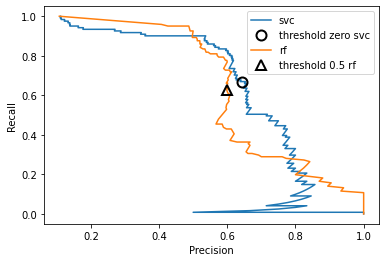

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero svc', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(threshold_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label='threshold 0.5 rf', fillstyle='none', mew=2)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

In [86]:
print(f'f1_score of random forest: {f1_score(y_test, rf.predict(X_test))}')
print(f'f1_score of svc: {f1_score(y_test, svc.predict(X_test))}')

f1_score of random forest: 0.6097560975609757
f1_score of svc: 0.6558704453441295


In [88]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print(f'Average precision of random forest: {ap_rf}')
print(f'Average precision of svc: {ap_svc}')

Average precision of random forest: 0.659559370099291
Average precision of svc: 0.6663140319391998


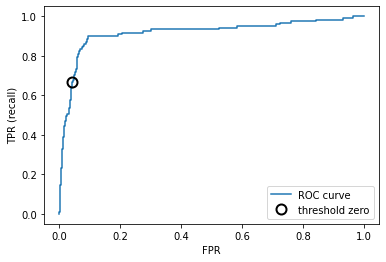

In [89]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR (recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

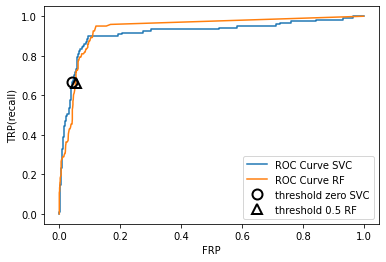

In [92]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='ROC Curve SVC')
plt.plot(fpr_rf, tpr_rf, label='ROC Curve RF')

plt.xlabel('FRP')
plt.ylabel('TRP(recall)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero SVC', fillstyle='none', c='k', mew=2)
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, label='threshold 0.5 RF', fillstyle='none', c='k', mew=2)

plt.legend(loc=4)

In [94]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print(f'AUC for Random Forest: {rf_auc}')
print(f'AUC for SVC: {svc_auc}')

AUC for Random Forest: 0.9366953672911659
AUC for SVC: 0.9162935036712654


gamma = 1  accuracy = 0.8955555555555555  AUC = 0.5
gamma = 0.05  accuracy = 0.8955555555555555  AUC = 0.9992080671559052
gamma = 0.01  accuracy = 0.8955555555555555  AUC = 0.999524840293543


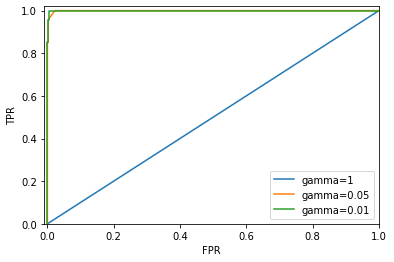

In [95]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print(f'gamma = {gamma}  accuracy = {accuracy}  AUC = {auc}')
    plt.plot(fpr, tpr, label='gamma={}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')


In [96]:
from sklearn.metrics import accuracy_score
X_train,X_test , y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(f'Confusion matrix: \n{confusion_matrix(y_test, pred)}')

Accuracy: 0.9511111111111111
Confusion matrix: 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion matrix')

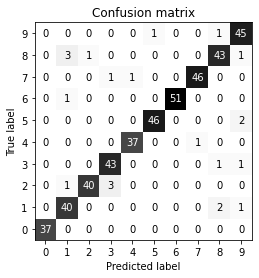

In [104]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label', ylabel='True label', xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')
plt.title('Confusion matrix')

In [105]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [107]:
print('Micro average f1 score: {}'.format(f1_score(y_test, pred, average='micro')))
print('Macro average f1 score: {}'.format(f1_score(y_test, pred, average='macro')))

Micro average f1 score: 0.9511111111111111
Macro average f1 score: 0.9518965775741322


In [109]:
print(f'Default scoring: {cross_val_score(SVC(), digits.data, digits.target == 9)}')
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='accuracy')
print(f'Explicit accuracy scoring: {explicit_accuracy}')
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='roc_auc')
print(f'AUC scoring: {roc_auc}')

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [110]:
X_train , X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)

param_grid = {'gamma': [0.0001,0.01, 0.1,1,10]}

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print(f'Grid-Search with accuracy')
print(f'Best parameters: {grid.best_params_}')
print(f'Best cross-validation score (accuracy): {grid.best_score_}')
print(f'Test set AUC: {roc_auc_score(y_test, grid.decision_function(X_test))}')
print(f'Test  set accuracy: {grid.score(X_test,y_test)}')

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy): 0.975500481894534
Test set AUC: 0.9919222849902327
Test  set accuracy: 0.9733333333333334


In [112]:
grid = GridSearchCV(SVC(), param_grid = param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)
print('\nGrid-Search with AUC')
print(f'Best  parameters: {grid.best_params_}')
print(f'Best cross-validaition score (AUC): {grid.best_score_}')
print(f'Test set AUC: {grid.score(X_test, y_test)}')


Grid-Search with AUC
Best  parameters: {'gamma': 0.01}
Best cross-validaition score (AUC): 0.997999457969529
Test set AUC: 0.999524840293543


In [114]:
from sklearn.metrics import SCORERS
print(f'Available scorers: {sorted(SCORERS.keys())}')

ModuleNotFoundError: No module named 'sklearn.metrics.Scorer'